**In this project, I tried to understand how mall customers can be grouped by spending behaviour, age and income; in order to offer better campaigns and offerings. For the analysis, I have used mall customers data provided by Vijay Choudhary @ Kaggle. I applied K-Means clustering through finding optimum number of clusters by The Elbow Method.**

**First of all, I installed required packages for the analysis & Kaggle data**

In [50]:
## Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sns.set()

SyntaxError: invalid syntax (ipython-input-1529883085.py, line 12)

In [51]:
pip install kaggle

In [4]:
# Setup Kaggle API (one-liner)
from google.colab import drive; drive.mount('/content/drive')
!mkdir -p ~/.kaggle && cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

# Download and unzip the dataset
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python
!unzip customer-segmentation-tutorial-in-python.zip

Mounted at /content/drive
Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 5.66MB/s]
Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


In [5]:
!ls

customer-segmentation-tutorial-in-python.zip  Mall_Customers.csv
drive					      sample_data


**In this step, I tried the understand basic structure of data:**
*   **It has 200 rows, 4 columns**
*   **Avg age of this customer group is 38, and they have 60K$ avg annual income. Average spending score is 50.**
*   **Standard deviation for age, annual income and spending score indicates that variation is high and values spread out of wide range.**




In [28]:
data = pd.read_csv("Mall_Customers.csv")
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


I also checked whether there are NA values or not for data cleansing purposes.
*   There are no NA values, so it is OK.



In [18]:
## Data Cleansing
if data.isnull().values.any() == False:
  print("There is no NULL value")
else:
  print("There is NULL value")
  data.dropna()
  print("NULL value has been removed")

There is no NULL value


**I would like to classify customers by their age and spending score, and their income and spending score. I splitted the data for each analysis; and run the Elbow Method in order to find best number of customers**
*   **I used k=10 as hyperparameter for both; which is the number of k clusters used for Elbow calculation.**
*   **Within-Cluster Sum of Squares (WCSS) measures how well the data points are clustered around their respective centroids. It is defined as the sum of the squared distances between each point and its cluster centroid. It was calculated each number of k clusters.**
*   **I defined k=5 as the elbow point for Age_SS, and k=6 for Income_SS. I choose them because after these numbers of K clusters, there are no significant decrease in WCSS.**

In [49]:
## Data split for Age_SS
x = data.iloc[:,[2,4]]
print(x)

## Data split for Income_SS
y = data.iloc[:,[3,4]]
print(y)

     Age  Spending Score (1-100)
0     19                      39
1     21                      81
2     20                       6
3     23                      77
4     31                      40
..   ...                     ...
195   35                      79
196   45                      28
197   32                      74
198   32                      18
199   30                      83

[200 rows x 2 columns]
     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[20

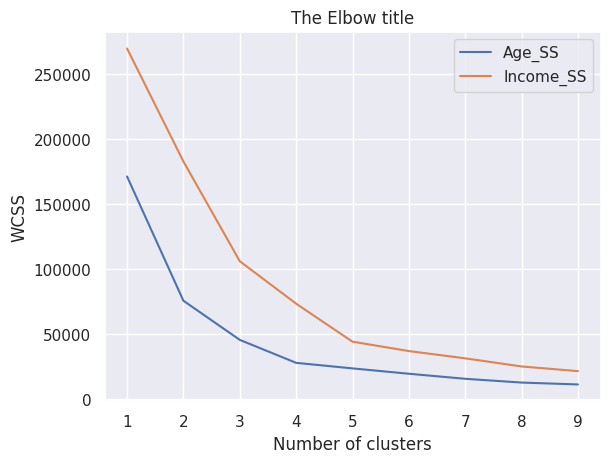

In [43]:
## WCSS for Age_SS
wcss=[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters, wcss, label="Age_SS")
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## WCSS for Income_SS
wcss_2=[]

for i in range(1,10):
    kmeans_3 = KMeans(i)
    kmeans_3.fit(y)
    wcss_iter_2 = kmeans_3.inertia_
    wcss_2.append(wcss_iter_2)

number_clusters_2 = range(1,10)
plt.plot(number_clusters_2, wcss_2, label="Income_SS")
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.legend()

In [36]:
## No. of clusters for Age_SS
kmeans_2 = KMeans(5)
print(kmeans_2.fit(x))

## No. of clusters for Income_SS
kmeans_4 = KMeans(6)
print(kmeans_4.fit(y))

KMeans(n_clusters=5)
KMeans(n_clusters=5)


In [39]:
## Array for identified clusters for Income_SS
identified_clusters = kmeans_2.fit_predict(x)
print(identified_clusters)

## Array for identified clusters for Age_SS
identified_clusters_2 = kmeans_4.fit_predict(y)
print(identified_clusters_2)

[3 0 2 0 3 0 2 0 2 0 2 0 2 0 2 0 1 3 1 0 1 0 2 0 2 0 1 3 1 0 2 0 2 0 2 0 2
 0 2 0 4 0 1 3 1 3 4 3 3 3 1 3 3 4 1 1 4 4 3 1 4 3 4 4 4 3 1 4 3 3 4 1 4 4
 4 3 1 1 3 1 4 3 4 1 3 1 4 3 3 1 4 3 1 1 3 3 1 3 1 3 3 1 4 3 4 3 4 4 4 4 4
 3 1 3 3 3 4 4 1 4 3 1 3 0 3 0 1 0 2 0 2 0 3 0 2 0 2 0 2 0 2 0 3 0 2 0 1 0
 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0 2 0 2 3 2 0 2 0 2 0 2 0 2 0 1 0 2 0 1
 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0]
[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


**Finally, I created a plot for both Age_SS and Income_SS.**

Text(0, 0.5, 'Spending Score (1-100)')

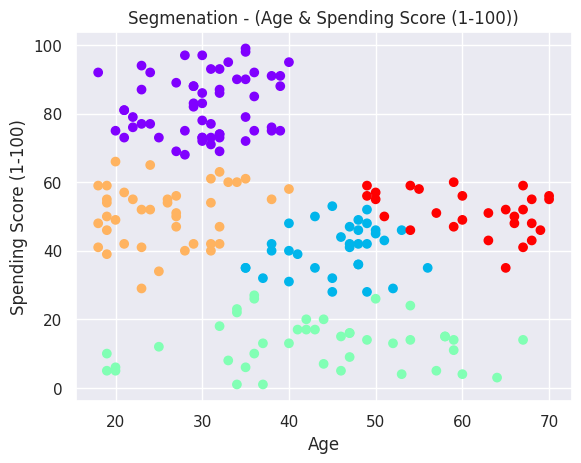

In [47]:
## Plot for Age_SS
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.scatter(data_with_clusters['Age'], data_with_clusters['Spending Score (1-100)'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.title('Segmenation - (Age & Spending Score (1-100))')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')


Text(0, 0.5, 'Spending Score (1-100)')

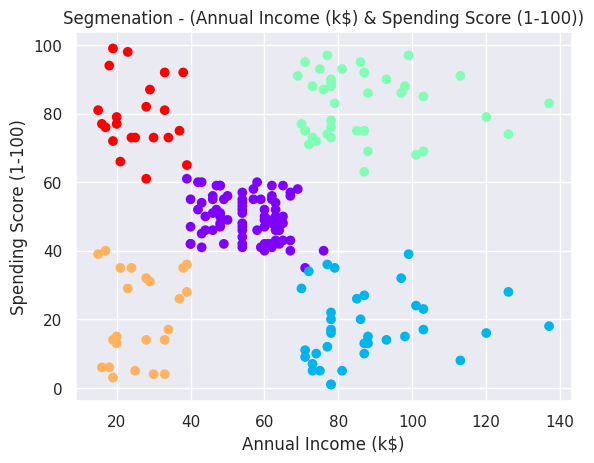

In [46]:
## Plot for Income_SS
data_with_clusters_2 = data.copy()
data_with_clusters_2['Clusters'] =identified_clusters_2
plt.scatter(data_with_clusters_2['Annual Income (k$)'], data_with_clusters_2['Spending Score (1-100)'], c=data_with_clusters_2['Clusters'], cmap='rainbow')
plt.title('Segmenation - (Annual Income (k$) & Spending Score (1-100))')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')